In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filename = "/content/juan.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,Peso,Talla,Tiempo de Gestación,Número de Consultas Prenatales,APGAR1,Edad de la Madre,Edad del Padre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3.615,51,42,9,9.0,18,26,NaN,0.620321,NaN,1,NaN
1,3.860,53,42,4,10.0,19,22,NaN,NaN,NaN,NaN,NaN
2,3.450,49,41,9,9.0,20,27,NaN,NaN,NaN,NaN,NaN
3,3.600,51,41,8,8.0,19,20,NaN,NaN,NaN,NaN,NaN
4,3.780,51,41,8,9.0,23,22,NaN,NaN,NaN,NaN,NaN


In [ ]:
tabla = tabla[["Edad de la Madre",
               "Tiempo de Gestación",
               "Peso"]]
Y= tabla.Peso
X= tabla.drop(['Peso'], axis=1)
X.head()

,Edad de la Madre,Tiempo de Gestación
0,18,42
1,19,42
2,20,41
3,19,41
4,23,41


In [ ]:
print(np.linspace(10,-2,100)[:10])
lambdas = 10**np.linspace(10,-2,100)*0.5
# print(lambdas[:10])
# print(lambdas[-10:])

[10.          9.87878788  9.75757576  9.63636364  9.51515152  9.39393939
  9.27272727  9.15151515  9.03030303  8.90909091]


In [ ]:
sin_atipicos = tabla[(tabla["Peso"] < 6000) & (tabla["Tiempo de Gestación"] < 80)]
sin_atipicos.head()


,Edad de la Madre,Tiempo de Gestación,Peso
0,18,42,3.615
1,19,42,3.860
2,20,41,3.450
3,19,41,3.600
4,23,41,3.780


In [ ]:
tabla1 = pd.concat([sin_atipicos["Peso"], sin_atipicos["Tiempo de Gestación"],  sin_atipicos["Edad de la Madre"]], axis = 1)
tabla1.head()

,Peso,Tiempo de Gestación,Edad de la Madre
0,3.615,42,18
1,3.860,42,19
2,3.450,41,20
3,3.600,41,19
4,3.780,41,23


In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["Peso"], tabla1["Tiempo de Gestación"], tabla1["Edad de la Madre"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba


In [ ]:
print(x_train, y_train, z_train)



49     3.46
336    3.45
655    3.30
355    3.48
635    3.20
       ... 
200    3.77
357    3.48
871    3.46
527    3.70
238    3.84
Name: Peso, Length: 644, dtype: float64 49     40
336    39
655    38
355    39
635    38
       ..
200    40
357    39
871    37
527    39
238    40
Name: Tiempo de Gestación, Length: 644, dtype: int64 49     17
336    28
655    27
355    32
635    36
       ..
200    37
357    27
871    24
527    35
238    25
Name: Edad de la Madre, Length: 644, dtype: int64


In [ ]:
yz_train = pd.concat([y_train, z_train], axis=1)
yz_train

,Tiempo de Gestación,Edad de la Madre
49,40,17
336,39,28
655,38,27
355,39,32
635,38,36
...,...,...
200,40,37
357,39,27
871,37,24
527,39,35


In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
yz_test

,Tiempo de Gestación,Edad de la Madre
41,40,14
293,39,27
275,39,31
224,40,18
687,38,31
...,...,...
140,40,14
273,40,25
559,39,21
400,39,36


In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso = Lasso(max_iter = 10000)
coefs = []

for k in lambdas:
    lasso.set_params(alpha = k)
    lasso.fit(scale(yz_train), x_train)
    coefs.append(lasso.coef_)


np.shape(coefs)


(100, 2)

In [ ]:

print("El intercepto del modelo es: ", lasso.intercept_)
print("Coeficiente:", list(zip(yz_train, lasso.coef_.flatten(), )))

El intercepto del modelo es:  3.6013448757763973
Coeficiente: [('Tiempo de Gestación', 0.03200872186614566), ('Edad de la Madre', -0.002370468950973517)]


In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000) #utilizamos cros validation
lassocv.fit(yz_train, x_train)


LassoCV(cv=10, max_iter=100000)

In [ ]:
print(pd.Series(lassocv.coef_, index = X.columns)) #Valor de coeficientes

Edad de la Madre       0.037043
Tiempo de Gestación   -0.001090
dtype: float64


In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
print("El valor de lambda encontrado con cross validation es:", round(lassocv.alpha_, 3))
lasso.fit(yz_train, x_train)


El valor de lambda encontrado con cross validation es: 0.0


Lasso(alpha=0.0004833217067711525, max_iter=10000)

In [ ]:
x_pred = lasso.predict(yz_test)
x_pred

array([3.65438235, 3.60317519, 3.59881685, 3.65002401, 3.56177429,
       3.59554809, 3.55959512, 3.57811806, 3.59990643, 3.54978886,
       3.67943947, 3.61080228, 3.60535436, 3.57920765, 3.57049097,
       3.6293219 , 3.59554809, 3.61407104, 3.6020856 , 3.64457608,
       3.62714273, 3.57049097, 3.57484931, 3.57267014, 3.59772726,
       3.57267014, 3.60317519, 3.61080228, 3.60862311, 3.57375973,
       3.57484931, 3.64566567, 3.57484931, 3.60644394, 3.52146298,
       3.64675525, 3.56177429, 3.56613263, 3.57702848, 3.56504305,
       3.61733979, 3.55741595, 3.60317519, 3.53889634, 3.60426477,
       3.60753353, 3.59445851, 3.57049097, 3.55305762, 3.64021774,
       3.56504305, 3.68597698, 3.59336893, 3.59772726, 3.60753353,
       3.59881685, 3.59663768, 3.56722222, 3.5683118 , 3.64021774,
       3.53017966, 3.64021774, 3.55741595, 3.56613263, 3.56940139,
       3.60644394, 3.57811806, 3.59881685, 3.60099602, 3.61298145,
       3.63150107, 3.52800049, 3.5683118 , 3.55632637, 3.56504

In [ ]:
ECMcv = round(mean_squared_error(x_test, x_pred),3)
print(ECMcv)

0.035


In [ ]:
x_pred = lasso.predict(yz_test)
x_pred

array([3.65438235, 3.60317519, 3.59881685, 3.65002401, 3.56177429,
       3.59554809, 3.55959512, 3.57811806, 3.59990643, 3.54978886,
       3.67943947, 3.61080228, 3.60535436, 3.57920765, 3.57049097,
       3.6293219 , 3.59554809, 3.61407104, 3.6020856 , 3.64457608,
       3.62714273, 3.57049097, 3.57484931, 3.57267014, 3.59772726,
       3.57267014, 3.60317519, 3.61080228, 3.60862311, 3.57375973,
       3.57484931, 3.64566567, 3.57484931, 3.60644394, 3.52146298,
       3.64675525, 3.56177429, 3.56613263, 3.57702848, 3.56504305,
       3.61733979, 3.55741595, 3.60317519, 3.53889634, 3.60426477,
       3.60753353, 3.59445851, 3.57049097, 3.55305762, 3.64021774,
       3.56504305, 3.68597698, 3.59336893, 3.59772726, 3.60753353,
       3.59881685, 3.59663768, 3.56722222, 3.5683118 , 3.64021774,
       3.53017966, 3.64021774, 3.55741595, 3.56613263, 3.56940139,
       3.60644394, 3.57811806, 3.59881685, 3.60099602, 3.61298145,
       3.63150107, 3.52800049, 3.5683118 , 3.55632637, 3.56504

In [ ]:
r_cuadrada = r2_score(x_test, x_pred)
print("R^2 = ", round(r_cuadrada,3))

n = len(yz_train)
p = len(x_train)
r_cuad_aj =1 - (((1- r_cuadrada)*(n-1))/(n-p-1))

print("n = ",n)
print("p =",p)
print("R^2 =", round(r_cuad_aj,3)) #porcentaje de variabilidad utilizamos la r^2 ajustada

R^2 =  0.044
n =  644
p = 644
R^2 = 615.718


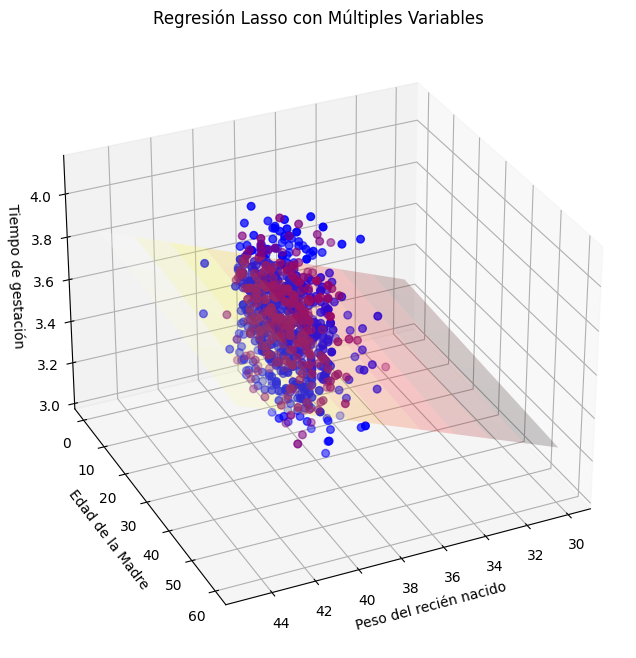

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(30, 45, num=10), np.linspace(0, 60, num=10))
n = list(zip(yz_train, lasso.coef_.flatten(), ))

nuevoX = (n[0][1] * xx)
nuevoY = (n[1][1] * yy)


x = (nuevoX + nuevoY + lasso.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["Tiempo de Gestación"], yz_train["Edad de la Madre"], x_train, c='blue',s=30)
ax.scatter(yz_test["Tiempo de Gestación"], yz_test["Edad de la Madre"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Peso del recién nacido')
ax.set_ylabel('Edad de la Madre')
ax.set_zlabel('Tiempo de gestación')
ax.set_title('Regresión Lasso con Múltiples Variables')

plt.show()

In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = lasso.score(yz_test, x_test)
r2

0.04398477217257435

In [ ]:
import numpy as np

u = np.array([1,2,3])
v = u
u@v

14

In [ ]:
M = np.array( [ [i+j for j in range(3)] for i in range(3)])
1+M

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])